In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [3]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [1]:
pip install fasttext

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import fasttext
from fasttext import load_model

In [6]:
train_dataset=pd.read_csv('../input/nlp-getting-started/train.csv')
test_dataset=pd.read_csv('../input/nlp-getting-started/test.csv')

In [7]:
train_dataset.shape

(7613, 5)

In [8]:
test_dataset.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

In [9]:
train_dataset.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [10]:
train_dataset.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [11]:
len(train_dataset.text.unique())

7503

In [12]:
train_dataset.keyword.unique()
len(train_dataset.keyword.unique())

222

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2424177b10>]],
      dtype=object)

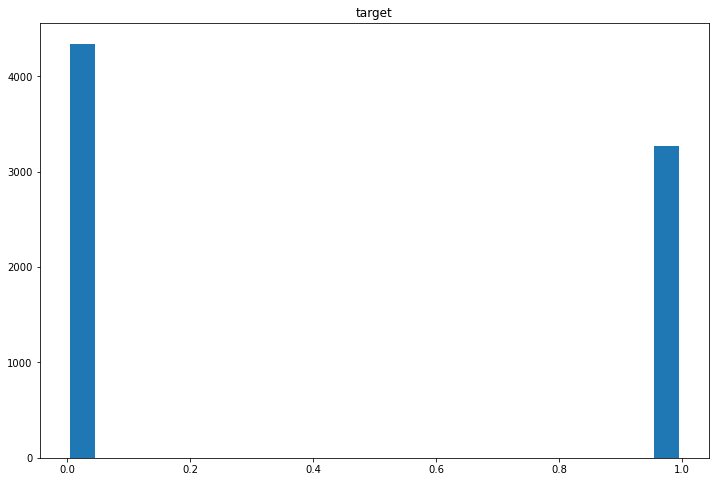

In [13]:
train_dataset.hist(column='target',bins=20,grid=False,figsize=(12,8),zorder=2,rwidth=0.8)

**Data Preprocessing Steps**

In [14]:
train_dataset['target'].mean()

0.4296597924602653

In [15]:
train_dataset.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [16]:
#lower casing the letters
train_dataset['text']=train_dataset['text'].str.lower()

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [18]:
train_dataset['text']=train_dataset['text'].apply(remove_punctuations)

In [19]:
#tokenizing the text
train_dataset['text']=train_dataset.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [20]:
train_dataset.iloc[2]

id                                                          5
keyword                                                   NaN
location                                                  NaN
text        [all, residents, asked, to, shelter, in, place...
target                                                      1
Name: 2, dtype: object

In [21]:
#removing stopwords

stopwords=stopwords.words('english')
train_dataset['text']=train_dataset['text'].apply(lambda x: ' '.join(word for word in x if word not in (stopwords)))

In [22]:
train_dataset.iloc[2]

id                                                          5
keyword                                                   NaN
location                                                  NaN
text        residents asked shelter place notified officer...
target                                                      1
Name: 2, dtype: object

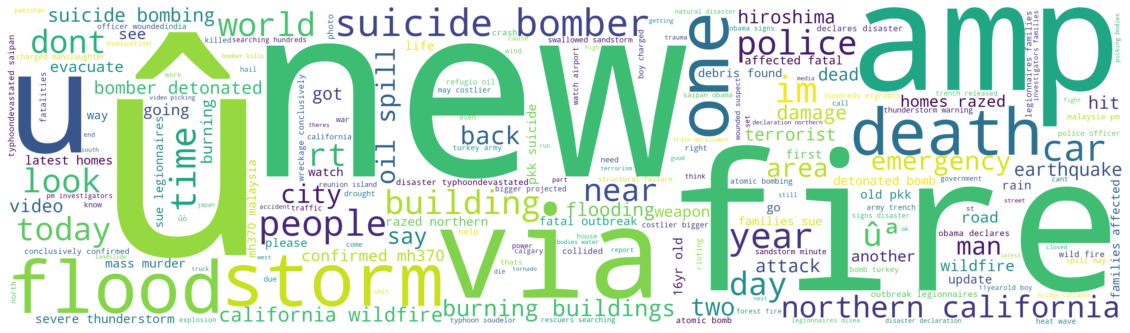

In [23]:
plt.figure(figsize=(20,8))
target = ' '.join(train_dataset[train_dataset['target']==1]['text'].to_list())
wordcloud = WordCloud(background_color="white",width=3500,height=1000).generate(target)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
X_train,X_test,y_train,y_test=train_test_split(train_dataset['text'],train_dataset['target'],random_state=0)

In [25]:
print(X_train.iloc[0],X_train.shape)
print(y_train.iloc[0],y_train.shape)
print(X_test.iloc[0],X_test.shape)

refugio oil spill may costlier bigger projected plains american pipeline oil spill httptcoyhmregauxz (5709,)
1 (5709,)
katiekatcubs already know shit goes world series armageddon (1904,)


In [26]:
len(X_train)

5709

In [78]:
sample_submission=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [79]:
sample_submission.head

<bound method NDFrame.head of          id  target
0         0       0
1         2       0
2         3       0
3         9       0
4        11       0
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       0
3261  10874       0
3262  10875       0

[3263 rows x 2 columns]>

***FastText model***

In [27]:
with open('fasttext_train.txt', 'w') as f:
    for each_text, each_label in zip(X_train,y_train):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [28]:
with open('fasttext_validation.txt', 'w') as f:
    for each_text, each_label in zip(X_test,y_test):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [29]:
model = fasttext.train_supervised('./fasttext_train.txt')

In [30]:
print(model.words)

['</s>', 'like', 'im', 'amp', 'fire', 'get', 'new', 'via', 'news', 'one', 'dont', 'people', '2', 'us', 'emergency', 'video', 'disaster', 'police', 'would', 'still', 'burning', 'california', 'back', 'crash', 'body', 'got', 'suicide', 'first', 'storm', 'cant', 'buildings', 'fires', 'rt', 'going', 'know', 'man', 'day', 'nuclear', 'see', 'dead', 'killed', 'world', 'youtube', 'families', 'time', 'train', 'love', 'may', '3', 'attack', 'today', 'bomb', 'u', 'war', 'think', 'go', 'two', 'hiroshima', 'watch', 'say', 'full', 'good', 'accident', 'car', 'life', 'best', 'mass', 'many', 'last', 'collapse', 'right', 'could', 'na', 'years', 'mh370', 'need', 'hot', 'look', 'really', 'way', 'pm', 'another', 'want', 'bombing', 'wildfire', 'help', 'work', 'death', 'home', 'take', 'even', 'great', '5', 'youre', 'make', 'year', '2015', 'army', 'please', 'water', 'never', 'fatal', 'obama', 'legionnaires', 'floods', 'forest', 'homes', 'city', 'northern', 'latest', 'school', 'god', 'much', '4', 'live', 'said',

In [31]:
print(model.labels)

['__label__0', '__label__1']


In [38]:
!head -n 5 ./fasttext_validation.txt

__label__0 katiekatcubs already know shit goes world series armageddon
__label__0 lemairelee danharmon people near meltdown comics free time wait line sunday nights representative sample 140
__label__0 16 tix calgary flames vs col avalanche preseason 929 scotiabank saddledome httptco5g8qa6mpxm
__label__0 ever think running choices life rembr theres kid choice wear suicide bomb vest
__label__0 dotish blight car go right ahead mine


In [32]:
def print_results(N, precision, recall):
    print("N\t" + str(N))
    print("Precision{}\t{:.3f}".format(2, precision))
    print("Recall{}\t{:.3f}".format(2, recall))

print_results(*model.test('./fasttext_validation.txt'))

N	1904
Precision2	0.806
Recall2	0.806


**Text Data Preprocessing**

In [57]:
#lower casing the letters
test_dataset['text']=test_dataset['text'].str.lower()

In [58]:
test_dataset['text']=test_dataset['text'].str.replace('http\S+|www.\S+', '', case=False)

In [62]:
test_dataset['text'][15]

"birmingham wholesale market is ablaze bbc news - fire breaks out at birmingham's wholesale market "

In [63]:
#remove punctuations
test_dataset['text']=test_dataset['text'].apply(remove_punctuations)

In [64]:
#tokenizing the text
test_dataset['text']=test_dataset.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [65]:
#removing stopwords
test_dataset['text']=test_dataset['text'].apply(lambda x: ' '.join(word for word in x if word not in (stopwords)))

In [66]:
#converting test file into text 

with open('fasttext_test.txt', 'w') as f:
    for text in zip(test_dataset['text']):
        f.writelines(f'{text}\n')

In [67]:
!head -n 5 ./fasttext_test.txt

('happened terrible car crash',)
('heard earthquake different cities stay safe everyone',)
('forest fire spot pond geese fleeing across street save',)
('apocalypse lighting spokane wildfires',)
('typhoon soudelor kills 28 china taiwan',)


In [68]:
text_list=test_dataset['text'].tolist()

In [69]:
text_list

['happened terrible car crash',
 'heard earthquake different cities stay safe everyone',
 'forest fire spot pond geese fleeing across street save',
 'apocalypse lighting spokane wildfires',
 'typhoon soudelor kills 28 china taiwan',
 'shakingits earthquake',
 'theyd probably still show life arsenal yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'dont like cold',
 'nooooooooo dont',
 'dont tell',
 '',
 'awesome',
 'birmingham wholesale market ablaze bbc news fire breaks birminghams wholesale market',
 'sunkxssedharry wear shorts race ablaze',
 'previouslyondoyintv toke makinwa\x89ûªs marriage crisis sets nigerian twitter ablaze',
 'check nsfw',
 'psa i\x89ûªm splitting personalities techies follow ablazeco burners follow ablaze',
 'beware world ablaze sierra leone amp guap',
 'burning man ablaze turban diva via etsy',
 'diss song people take 1 thing run smh eye opener though 2 set game ablaze cyhitheprynce',
 'rape victim dies sets ablaze 16yearold girl died burn injuries set ablaze\x

In [71]:
test_predictions=model.predict(text_list)

In [73]:
test_predictions[0][1]

['__label__0']

In [81]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [87]:
len(test_predictions[0])

3263

In [82]:
sample_submission['id']=test_dataset['id']

In [83]:
sample_submission['target']=0

In [90]:
sample_submission['target'][3]

0

In [99]:
for i in range(len(test_predictions[0])):
    text=str(test_predictions[0][i]).replace('[','').replace(']','')
    sample_submission['target'][i]=int(''.join(c for c in text if c.isdigit()))

In [100]:
sample_submission.head

<bound method NDFrame.head of          id  target
0         0       1
1         2       0
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       0

[3263 rows x 2 columns]>

In [ ]:
sample_submission.to_csv('nlp_submission_5.csv',index=False)